# Eagle Behavior and Risk Modeling for Wind Energy workshop 
## Stochastic Soaring Raptor Simulator (SSRS)
### Demonstration

Github repository: https://github.com/NREL/SSRS 

Journal publication: Stochastic agent-based model for predicting turbine-scale raptor movements during updraft-subsidized directional flights. Ecological Modelling, April 2022. [link](https://www.sciencedirect.com/science/article/pii/S0304380022000047)

Salient features:
- Easy to use tool for predicting conflict between likely golden eagle routes and operational/planned wind turbines
- Simulates a large number of golden eagle tracks from a given location/region under given wind conditions
- Applicable to any region in the continental US since it only uses publicly available data sources
    - NREL's Wind ToolKit for extracting atmospheric conditions (currently 2007-2014)
    - USGS's Wind Turbine Database for extracting turbine locations (updated monthly)
    - USGS's 3DEP data for extracting terrain features at high resolutions (upto 10 m)
- Captures uncertainty in atmospheric conditions, eagle decision-making, and starting/entry location

In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
# load the Simulator and Config classes from the ssrs package
from ssrs import Simulator, Config

In [3]:
# create a default config object and print the defualt parameter settings for SSRS
default_config = Config()
print(default_config)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = default
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = -1
sim_mode = uniform
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-106.21, 42.78)
projected_crs = ESRI:102008
region_width_km = (60.0, 50.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 270.0
uniform_windspeed = 10.0

:::: Snapshot mode
snapshot_datetime = (2010, 6, 17, 13)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = 0
track_count = 1000
track_start_region = (5, 55, 1, 2)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restrict = 

### Test 1: Wyoming region
- 100 m resolution
- Uniform mode: westerly winds of 10 m/s
- northerly movements starting randomly from southern boundary
- 500 simulated tracks

In [4]:
# load replace utility from dataclasses to manipulate SSRS configuration
from dataclasses import replace

In [5]:
# Create a configuration for test1, and print the settings
wy_test1 =replace(
    default_config, 
    run_name='wy_test',
    sim_seed = 10,
    southwest_lonlat = (-106.21, 42.78),
    region_width_km = (60.0, 50.0),
    resolution = 100.,
    sim_mode = 'uniform',
    uniform_windspeed = 10.0,
    uniform_winddirn = 270.0,
    track_direction = 0,
    track_count = 500,
    track_start_region = (5, 55, 1, 2),
    updraft_threshold = 0.75
)
print(wy_test1)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = wy_test
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = 10
sim_mode = uniform
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-106.21, 42.78)
projected_crs = ESRI:102008
region_width_km = (60.0, 50.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 270.0
uniform_windspeed = 10.0

:::: Snapshot mode
snapshot_datetime = (2010, 6, 17, 13)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = 0
track_count = 500
track_start_region = (5, 55, 1, 2)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restrict = 1

In [6]:
# initiate the SSRS simulation object
wy_sim1 = Simulator(wy_test1)


---- SSRS in uniform mode
Run name: wy_test
Specified random number seed: 10
Output dir: /Users/rsandhu/eagle_project/SSRS/workshop/output/wy_test
Terrain resolution = 100.0 m
Terrain grid size = (500, 600)
Terrain: Bounds set to [-106.28, 42.78, -105.44, 43.25]
Terrain: Downloading DEM data from 3DEP..
WMS: Downloading data for 15 tiles..
Terrain: Downloading Slope Degrees data from 3DEP..
WMS: Downloading data for 15 tiles..
Terrain: Downloading Aspect Degrees data from 3DEP..
WMS: Downloading data for 15 tiles..
TurbinesUSWTB: Importing turbine data from USWTB..
Uniform mode: Wind speed = 10.0 m/s
Uniform mode: Wind dirn = 270.0 deg(cw)
Computing orographic updrafts..
No thermals requested!
SSRS Simulator initiation done.


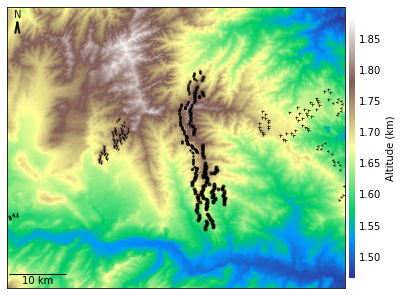

In [7]:
# plot the terrain
wy_sim1.plot_terrain_elevation(show=True)

In [8]:
# print the details about the wind power plants contained within the terrain bounds
wy_sim1.turbines.print_details()

Number of projects: 9
Number of turbines: 415
Hub height (min,median,max): 80.0, 80.0, 89.0
Rotor Dia (min,median,max): 77.0, 91.0, 127.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Cedar Springs II          WY    2020  3     89.0      127.0     
2.  Cedar Springs III         WY    2020  46    89.0      127.0     
3.  Cedar Springs I           WY    2020  23    89.0      127.0     
4.  Top of the World          WY    2010  110   80.0      77.0      
5.  Glenrock                  WY    2008  66    80.0      91.0      
6.  Rolling Hills             WY    2009  66    80.0      91.0      
7.  Glenrock III              WY    2009  26    80.0      91.0      
8.  Campbell Hill             WY    2009  66    80.0      77.0      
9.  Casper Wind Farm          WY    2009  9     80.0      77.0      


Plotting updraft fields..


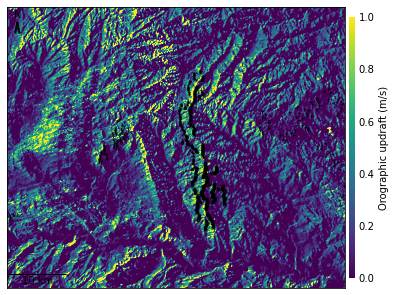

In [9]:
# plot orographic updrafts without applying the updraft threshold
wy_sim1.plot_updrafts(show=True, apply_threshold=False)

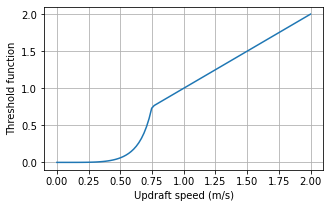

In [10]:
# plot the updraft threshold function that is applied to the updraft field
wy_sim1.plot_updraft_threshold_function(show=True)

Plotting updraft fields..


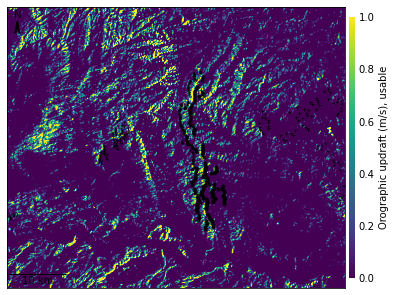

In [11]:
# plot the orographic updrafts after applying the threshold function
wy_sim1.plot_updrafts(show=True, apply_threshold=True)

In [12]:
# simulate the eagle tracks
wy_sim1.simulate_tracks()

Movement model = fluidflow
Updraft threshold = 0.75 m/s
Movement direction = 0 deg (cw)
s10d270_d0_t75_fluidflow_r0: Computing potential..took 33 sec
s10d270_d0_t75_fluidflow_r0: Simulating 500 tracks..took 11 sec


Plotting simulated tracks..


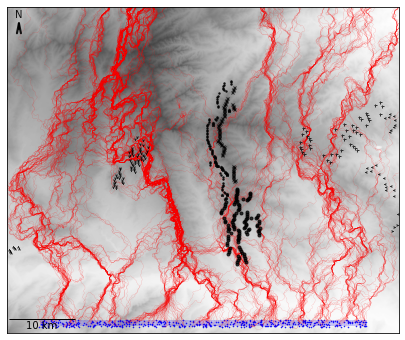

In [13]:
# plot the simulated tracks
wy_sim1.plot_simulated_tracks(show=True)

Plotting presence density map..


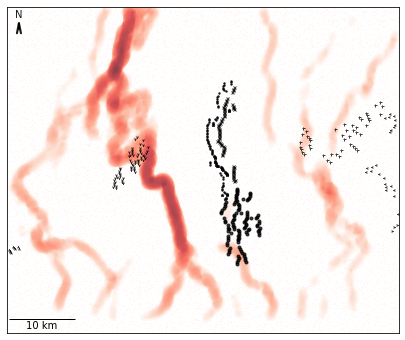

In [14]:
# plot the relative presence density map computed using the simulated tracks
wy_sim1.plot_presence_map(show=True)

In [15]:
# print the wind project names
wy_sim1.turbines.get_project_names()

array(['Campbell Hill', 'Casper Wind Farm', 'Cedar Springs I',
       'Cedar Springs II', 'Cedar Springs III', 'Glenrock',
       'Glenrock III', 'Rolling Hills', 'Top of the World'], dtype=object)

Plotting presence density map..


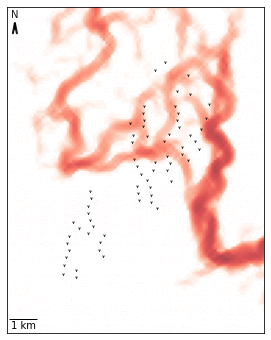

In [16]:
# print the presence density map for individual wind plants
wy_sim1.plot_windplant_presence_map('Campbell Hill', show=True)

Plotting presence density map..


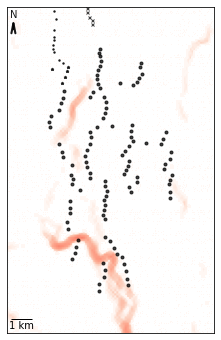

In [17]:
# print the presence density map for individual wind plants
wy_sim1.plot_windplant_presence_map('Top of the World', show=True)

### Test 2: Wyoming region
- Uniform mode: easterly winds of 8 m/s
- north-westerly movements starting from southeastern edge
- 500 simulated tracks

In [18]:
# create a new configuration using the previous config by changing just the modified parameters
wy_test2 =replace(
    wy_test1, 
    uniform_windspeed = 8.0,
    uniform_winddirn = 90.0,
    track_direction = -45,
    track_start_region = (55, 60, 0, 5)
)
print(wy_test2)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = wy_test
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = 10
sim_mode = uniform
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-106.21, 42.78)
projected_crs = ESRI:102008
region_width_km = (60.0, 50.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 90.0
uniform_windspeed = 8.0

:::: Snapshot mode
snapshot_datetime = (2010, 6, 17, 13)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = -45
track_count = 500
track_start_region = (55, 60, 0, 5)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restrict = 

In [19]:
# create the SSRS simulation object
wy_sim2 = Simulator(wy_test2)


---- SSRS in uniform mode
Run name: wy_test
Specified random number seed: 10
Output dir: /Users/rsandhu/eagle_project/SSRS/workshop/output/wy_test
Terrain resolution = 100.0 m
Terrain grid size = (500, 600)
Terrain: Bounds set to [-106.28, 42.78, -105.44, 43.25]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
Uniform mode: Wind speed = 8.0 m/s
Uniform mode: Wind dirn = 90.0 deg(cw)
Computing orographic updrafts..
No thermals requested!
SSRS Simulator initiation done.


Plotting updraft fields..


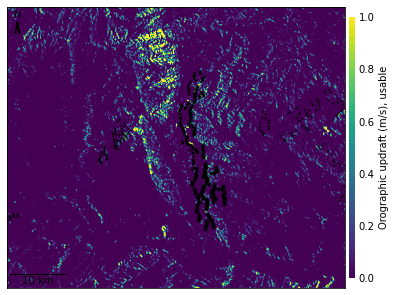

In [20]:
# plot the updraft field after applying the thershold updraft function
wy_sim2.plot_updrafts(show=True, apply_threshold=True)

In [21]:
# simulate the tracks
wy_sim2.simulate_tracks()

Movement model = fluidflow
Updraft threshold = 0.75 m/s
Movement direction = -45 deg (cw)
s8d90_d315_t75_fluidflow_r0: Computing potential..took 31 sec
s8d90_d315_t75_fluidflow_r0: Simulating 500 tracks..took 14 sec


Plotting simulated tracks..


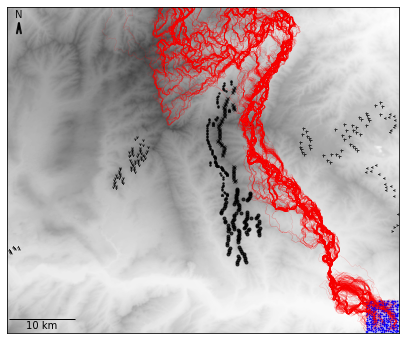

In [22]:
# plot simulated tracks
wy_sim2.plot_simulated_tracks(show=True)

Plotting presence density map..


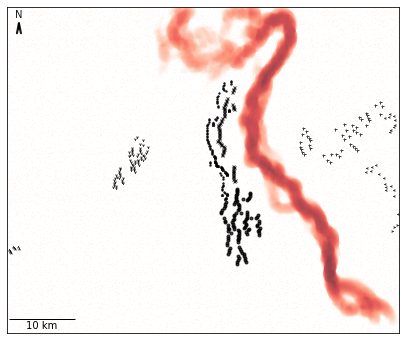

In [23]:
# plot the presence density map for the whole domain
wy_sim2.plot_presence_map(show=True)

Plotting presence density map..


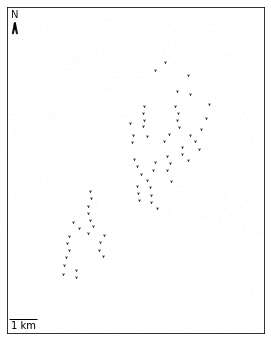

In [24]:
# plot the presence density map for the specific wind power plant
wy_sim2.plot_windplant_presence_map('Campbell Hill', show=True)

Plotting presence density map..


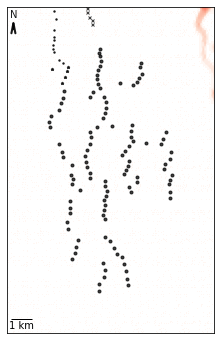

In [25]:
# plot the presence density map for the specific wind power plant
wy_sim2.plot_windplant_presence_map('Top of the World', show=True)

### Test 3: Altamont Pass in Calfornia
- 100 m resolution
- Snapshot mode: 29 March, 2012
- Southerly movements starting from northern boundary
- 500 simulated tracks

In [26]:
# create a new configuration by replacing the modified parameters from an existing configuration
alt_test1 =replace(
    wy_test1, 
    run_name='alt_test',
    southwest_lonlat = (-121.8, 37.55),
    region_width_km = (40., 40.),
    sim_mode = 'snapshot',
    snapshot_datetime=(2012, 3, 29, 10),
    track_direction = 180,
    track_count = 500,
    track_start_region = (2, 38, 38, 40)
)
print(alt_test1)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = alt_test
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = 10
sim_mode = snapshot
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-121.8, 37.55)
projected_crs = ESRI:102008
region_width_km = (40.0, 40.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 270.0
uniform_windspeed = 10.0

:::: Snapshot mode
snapshot_datetime = (2012, 3, 29, 10)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = 180
track_count = 500
track_start_region = (2, 38, 38, 40)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restric

In [27]:
# create the SSRS simulation object (this will take 10-20 seconds)
alt_sim1 = Simulator(alt_test1)


---- SSRS in snapshot mode
Run name: alt_test
Specified random number seed: 10
Output dir: /Users/rsandhu/eagle_project/SSRS/workshop/output/alt_test
Terrain resolution = 100.0 m
Terrain grid size = (400, 400)
Terrain: Bounds set to [-121.93, 37.55, -121.34, 37.97]
Terrain: Downloading DEM data from 3DEP..
WMS: Downloading data for 12 tiles..
Terrain: Downloading Slope Degrees data from 3DEP..
WMS: Downloading data for 12 tiles..
Terrain: Downloading Aspect Degrees data from 3DEP..
WMS: Downloading data for 12 tiles..
TurbinesUSWTB: Importing turbine data from USWTB..
Considering WindToolKit source: AWS
WTK: Downloading following layers:
temperature_100m
winddirection_100m
pressure_100m
windspeed_100m
WTK: Downloading data for 10 AM, 29 Mar 2012
Computing orographic updrafts..took 13 sec
No thermals requested!
SSRS Simulator initiation done.


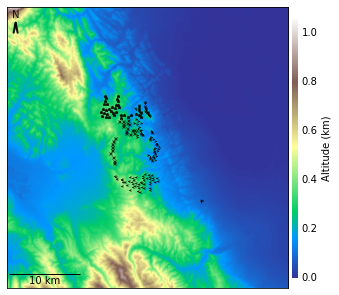

In [28]:
# plot the terrain elevation for the domain
alt_sim1.plot_terrain_elevation(show=True)

In [29]:
# print details about the wind power plants located within the domain
alt_sim1.turbines.print_details()

Number of projects: 7
Number of turbines: 194
Hub height (min,median,max): 55.0, 80.0, 90.0
Rotor Dia (min,median,max): 47.0, 100.0, 116.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Summit Wind Repowering    CA    2021  23    90.0      116.0     
2.  Golden Hills North        CA    2017  19    80.0      116.0     
3.  Vasco (repower)           CA    2011  34    80.0      101.0     
4.  Golden Hills              CA    2015  48    80.0      100.0     
5.  Buena Vista               CA    2006  37    55.0      61.4      
6.  Safeway Tracy             CA    2011  2     55.0      61.4      
7.  Diablo Winds              CA    2004  31    60.0      47.0      


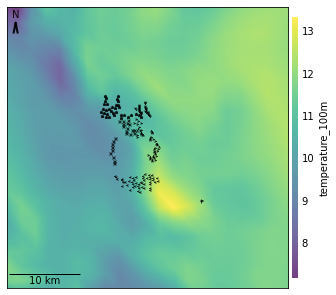

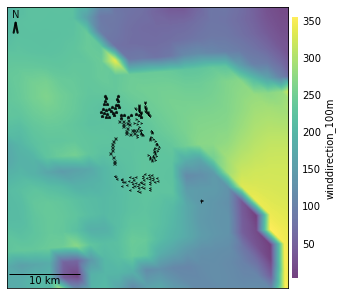

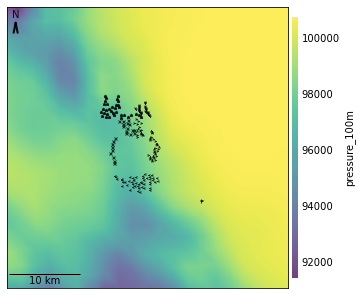

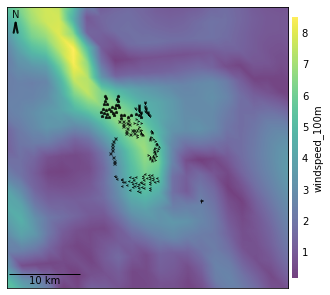

In [30]:
# plot the atmopsheric variables downloaded from WindToolKit (may take 10 seconds)
alt_sim1.plot_wtk_layers(show=True)

Plotting updraft fields..


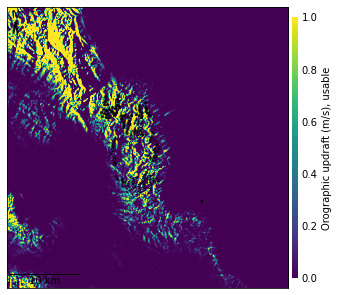

In [31]:
# plot the orographic updraft field
alt_sim1.plot_updrafts(show=True)

In [32]:
# simulate the tracks
alt_sim1.simulate_tracks()

Movement model = fluidflow
Updraft threshold = 0.75 m/s
Movement direction = 180 deg (cw)
y2012m03d29h10_d180_t75_fluidflow_r0: Computing potential..took 15 sec
y2012m03d29h10_d180_t75_fluidflow_r0: Simulating 500 tracks..took 7 sec


Plotting simulated tracks..


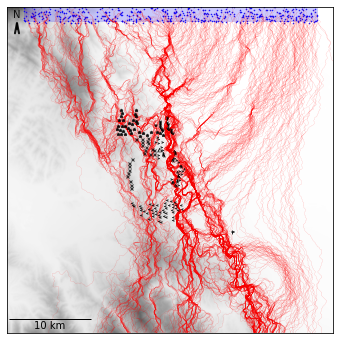

In [33]:
# plot the simulated tracks
alt_sim1.plot_simulated_tracks(show=True)

Plotting presence density map..


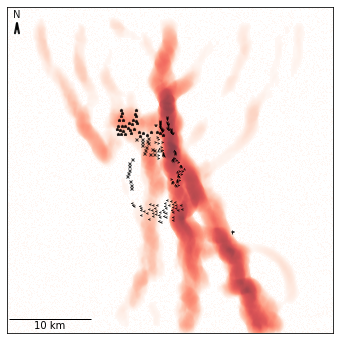

In [34]:
# plot the presence density map
alt_sim1.plot_presence_map(show=True)

In [35]:
# print the wind power plant projects within the domain
alt_sim1.turbines.get_project_names()

array(['Buena Vista', 'Diablo Winds', 'Golden Hills',
       'Golden Hills North', 'Safeway Tracy', 'Summit Wind Repowering',
       'Vasco (repower)'], dtype=object)

Plotting presence density map..


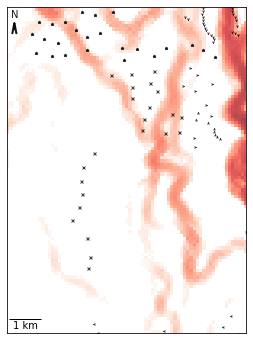

In [36]:
# plot the presence density map for the specific wind power plant
alt_sim1.plot_windplant_presence_map('Summit Wind Repowering', show=True)

Plotting presence density map..


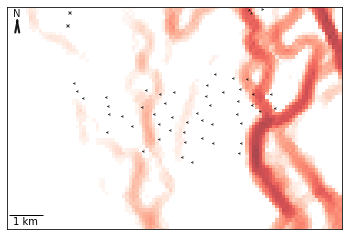

In [37]:
# plot the presence density map for the specific wind power plant
alt_sim1.plot_windplant_presence_map('Golden Hills', show=True)

### Test 4: Appalachian region
- 100 m resolution
- Uniform mode: north-westerly winds at 5 m/s
- Northerly movements starting from southern boundary
- 500 simulated tracks

In [38]:
# create a new configuration using the existing config
apl_test1 =replace(
    wy_test1, 
    run_name='apl_test',
    southwest_lonlat = (-79.71, 39.03),
    region_width_km = (60., 60.),
    sim_mode = 'uniform',
    uniform_windspeed = 5.0,
    uniform_winddirn = 315.0,
    track_direction = 0,
    track_count = 500,
    track_start_region = (5, 55, 0, 2)
)
print(apl_test1)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = apl_test
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = 10
sim_mode = uniform
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-79.71, 39.03)
projected_crs = ESRI:102008
region_width_km = (60.0, 60.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 315.0
uniform_windspeed = 5.0

:::: Snapshot mode
snapshot_datetime = (2010, 6, 17, 13)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = 0
track_count = 500
track_start_region = (5, 55, 0, 2)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restrict = 1


In [39]:
# create the SSRS simulator object
apl_sim1 = Simulator(apl_test1)


---- SSRS in uniform mode
Run name: apl_test
Specified random number seed: 10
Output dir: /Users/rsandhu/eagle_project/SSRS/workshop/output/apl_test
Terrain resolution = 100.0 m
Terrain grid size = (600, 600)
Terrain: Bounds set to [-79.71, 38.94, -78.86, 39.53]
Terrain: Downloading DEM data from 3DEP..
WMS: Downloading data for 20 tiles..
Terrain: Downloading Slope Degrees data from 3DEP..
WMS: Downloading data for 20 tiles..
Terrain: Downloading Aspect Degrees data from 3DEP..
WMS: Downloading data for 20 tiles..
TurbinesUSWTB: Importing turbine data from USWTB..
Uniform mode: Wind speed = 5.0 m/s
Uniform mode: Wind dirn = 315.0 deg(cw)
Computing orographic updrafts..
No thermals requested!
SSRS Simulator initiation done.


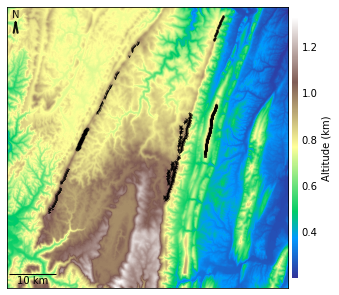

In [40]:
# plot the terrain elevation for the domain
apl_sim1.plot_terrain_elevation(show=True)

In [41]:
# print turbine details
apl_sim1.turbines.print_details()

Number of projects: 9
Number of turbines: 308
Hub height (min,median,max): 70.0, 78.0, 100.0
Rotor Dia (min,median,max): 72.0, 80.0, 100.0
    Project                   State Year  Count Hub_Hght  Rotor_Dia 
1.  Fair Wind                 MD    2015  12    100.0     100.0     
2.  New Creek Wind            WV    2016  49    78.0      97.0      
3.  Criterion                 MD    2010  28    80.0      96.0      
4.  Pinnacle                  WV    2011  23    80.0      95.0      
5.  Roth Rock                 MD    2011  20    80.0      90.0      
6.  NedPower Mount Storm, Ph  WV    2008  83    78.0      80.0      
7.  NedPower Mount Storm, Ph  WV    2008  47    78.0      80.0      
8.  Mount Storm, Phase I      WV    2008  2     78.0      80.0      
9.  Mountaineer Wind Energy   WV    2002  44    70.0      72.0      


Plotting updraft fields..


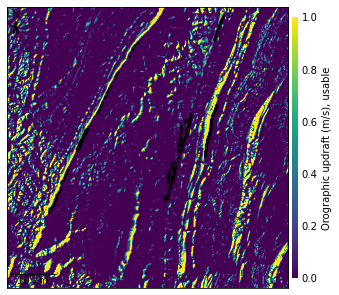

In [42]:
# plot the updrafts after applying the updraft threshold function
apl_sim1.plot_updrafts(show=True)

In [43]:
# simulate the tracks
apl_sim1.simulate_tracks()

Movement model = fluidflow
Updraft threshold = 0.75 m/s
Movement direction = 0 deg (cw)
s5d315_d0_t75_fluidflow_r0: Computing potential..took 47 sec
s5d315_d0_t75_fluidflow_r0: Simulating 500 tracks..took 11 sec


Plotting simulated tracks..


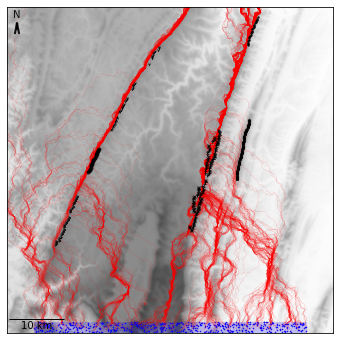

In [44]:
# plot the simulated tracks
apl_sim1.plot_simulated_tracks(show=True)

Plotting presence density map..


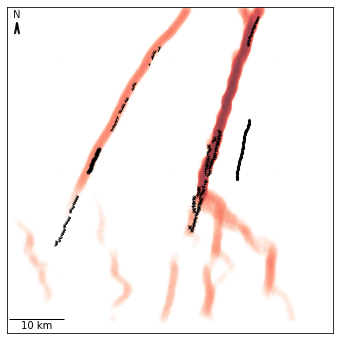

In [45]:
# plot the presence map
apl_sim1.plot_presence_map(show=True)

In [46]:
apl_sim1.turbines.get_project_names()

array(['Criterion', 'Fair Wind', 'Mount Storm, Phase I',
       'Mountaineer Wind Energy Center (Thomas)',
       'NedPower Mount Storm, Phase I', 'NedPower Mount Storm, Phase II',
       'New Creek Wind', 'Pinnacle', 'Roth Rock'], dtype=object)

Plotting presence density map..


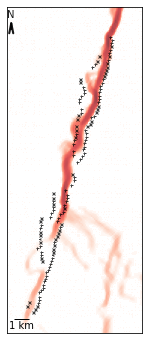

In [47]:
# plot the presence map for the specific wind power plant
apl_sim1.plot_windplant_presence_map('NedPower Mount Storm, Phase I', show=True)

Plotting presence density map..


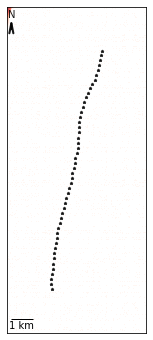

In [48]:
# plot the presence map for the specific wind power plant
apl_sim1.plot_windplant_presence_map('New Creek Wind', show=True)

### Test 5: Appalachian region
- 100 m resolution
- Uniform mode: north-westerly winds at 5 m/s
- Southerly movements starting from northern boundary
- 500 simulated tracks

In [49]:
apl_test2 =replace(
    apl_test1, 
    track_direction = 180,
    track_start_region = (5, 55, 58, 60),
    sim_seed=20,
)
print(apl_test2)

Configuration parameters for SSRS simulation 

:::: General settings
run_name = apl_test
out_dir = /Users/rsandhu/eagle_project/SSRS/workshop/output
max_cores = 8
sim_seed = 20
sim_mode = uniform
print_verbose = False

:::: Terrain settings
southwest_lonlat = (-79.71, 39.03)
projected_crs = ESRI:102008
region_width_km = (60.0, 60.0)
resolution = 100.0

:::: Uniform mode
uniform_winddirn = 315.0
uniform_windspeed = 5.0

:::: Snapshot mode
snapshot_datetime = (2010, 6, 17, 13)

:::: Seasonal mode
seasonal_start = (3, 20)
seasonal_end = (5, 15)
seasonal_timeofday = daytime
seasonal_count = 8

:::: WindToolKit settings
wtk_source = AWS
wtk_orographic_height = 100
wtk_thermal_height = 100
wtk_interp_type = linear

:::: Updraft computation
thermals_realization_count = 0
updraft_threshold = 0.75

:::: Simulating tracks
movement_model = fluidflow
track_direction = 180
track_count = 500
track_start_region = (5, 55, 58, 60)
track_start_type = random
track_stochastic_nu = 1.0
track_dirn_restrict 

In [50]:
apl_sim2 = Simulator(apl_test2)


---- SSRS in uniform mode
Run name: apl_test
Specified random number seed: 20
Output dir: /Users/rsandhu/eagle_project/SSRS/workshop/output/apl_test
Terrain resolution = 100.0 m
Terrain grid size = (600, 600)
Terrain: Bounds set to [-79.71, 38.94, -78.86, 39.53]
Terrain: Found saved raster data for DEM
Terrain: Found saved raster data for Slope Degrees
Terrain: Found saved raster data for Aspect Degrees
TurbinesUSWTB: Importing turbine data from USWTB..
Uniform mode: Wind speed = 5.0 m/s
Uniform mode: Wind dirn = 315.0 deg(cw)
Computing orographic updrafts..
No thermals requested!
SSRS Simulator initiation done.


In [51]:
apl_sim2.simulate_tracks()

Movement model = fluidflow
Updraft threshold = 0.75 m/s
Movement direction = 180 deg (cw)
s5d315_d180_t75_fluidflow_r0: Computing potential..took 55 sec
s5d315_d180_t75_fluidflow_r0: Simulating 500 tracks..took 17 sec


Plotting updraft fields..


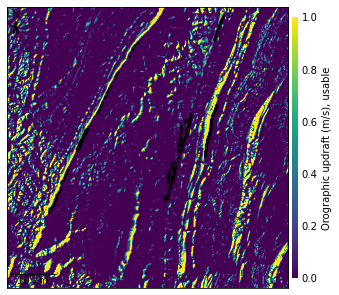

In [52]:
apl_sim2.plot_updrafts(show=True)

Plotting simulated tracks..


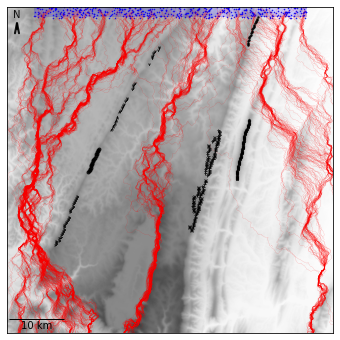

In [53]:
apl_sim2.plot_simulated_tracks(show=True)

Plotting presence density map..


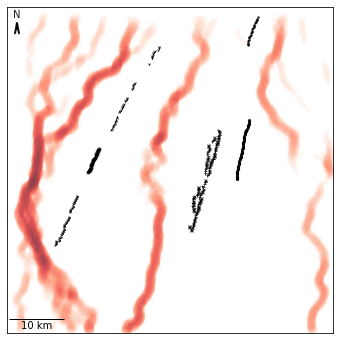

In [54]:
apl_sim2.plot_presence_map(show=True)

Plotting presence density map..


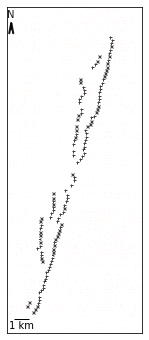

In [55]:
# plot the presence map for the specific wind power plant
apl_sim2.plot_windplant_presence_map('NedPower Mount Storm, Phase I', show=True)